<b>Polynomial Regression</b>

What if your data is actually more complex than a simple straight line? Surprisingly,
you can actually use a linear model to fit nonlinear data. A simple way to do this is to
add powers of each feature as new features, then train a linear model on this extended
set of features. This technique is called Polynomial Regression.

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

m = 100
X = 6 * np.random.rand(m, 1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

X=X.reshape(X.shape[0], )
Y=Y.reshape(X.shape[0], )

X=pd.Series(X)
Y=pd.Series(Y)

<AxesSubplot:>

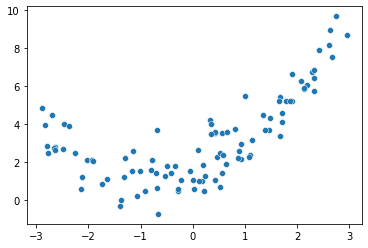

In [3]:
sns.scatterplot(x=X,y=Y)

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly
nomialFeatures class to transform our training data, adding the square (2nd-degree
polynomial) of each feature in the training set as new features (in this case there is
just one feature):

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
LinearRegression
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X=pd.DataFrame(X)

X_poly = poly_features.fit_transform(X)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)
lin_reg.intercept_, lin_reg.coef_

(1.5781214789238103, array([0.95373146, 0.57566904]))

In [6]:
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

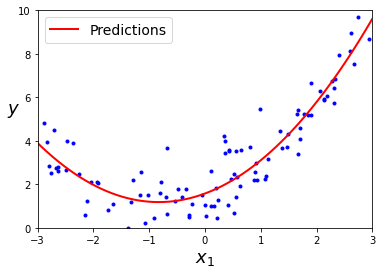

In [7]:
plt.plot(X.to_numpy(), Y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Not bad: the model estimates y = 0 . 56x1 2 + 0 . 93x1 + 1 . 78 when in fact the original
function was y = 0 . 5x1 2 + 1 . 0x1 + 2 . 0 + Gaussian noise.
Note that when there are multiple features, Polynomial Regression is capable of finding
relationships between features (which is something a plain Linear Regression
model cannot do). This is made possible by the fact that PolynomialFeatures also
adds all combinations of features up to the given degree.

<b> Learning Curves

If a model performs well on the training data but generalizes poorly
according to the cross-validation metrics, then your model is overfitting. If it performs
poorly on both, then it is underfitting. This is one way to tell when a model is
too simple or too complex.
Another way is to look at the learning curves: these are plots of the model’s performance
on the training set and the validation set as a function of the training set size.
To generate the plots, simply train the model several times on different sized subsets
of the training set.

LC for linear regression model is as follows:

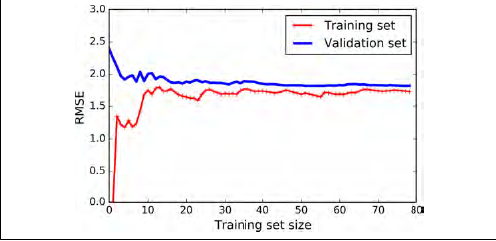

First, let’s look at the performance on the training
data: when there are just one or two instances in the training set, the model can fit
them perfectly, which is why the curve starts at zero. But as new instances are added
to the training set, it becomes impossible for the model to fit the training data perfectly,
both because the data is noisy and because it is not linear at all. So the error on
the training data goes up until it reaches a plateau, at which point adding new instances
to the training set doesn’t make the average error much better or worse. Now let’s
look at the performance of the model on the validation data. When the model is
trained on very few training instances, it is incapable of generalizing properly, which
is why the validation error is initially quite big. Then as the model is shown more
training examples, it learns and thus the validation error slowly goes down. However,
once again a straight line cannot do a good job modeling the data, so the error ends
up at a plateau, very close to the other curve.
These learning curves are typical of an underfitting model. Both curves have reached
a plateau; they are close and fairly high.

<b>Polynomial 10 degree curve

The error on the training data is much lower than with the Linear Regression
model.

There is a gap between the curves. This means that the model performs significantly
better on the training data than on the validation data, which is the hallmark
of an overfitting model. However, if you used a much larger training set,
the two curves would continue to get closer.

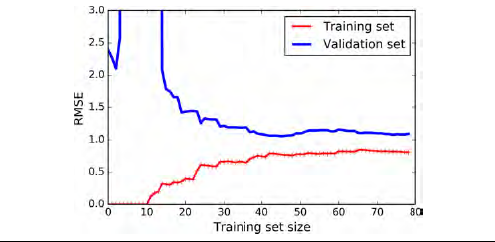

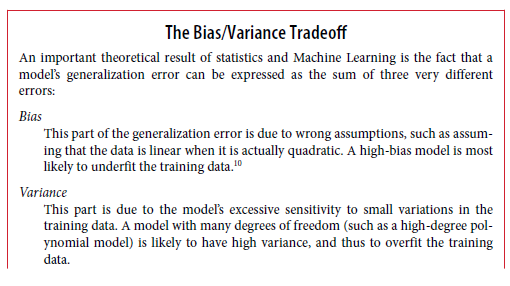

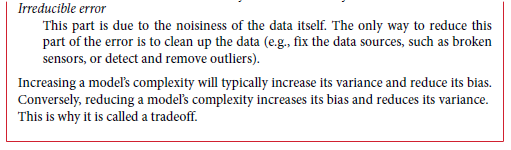

<b>Regularized Linear Models

Ridge Regression

Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear
Regression: a regularization term is added to the cost function.
This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible.

Note:

It is quite common for the cost function used during training to be
different from the performance measure used for testing. Apart
from regularization, another reason why they might be different is
that a good training cost function should have optimizationfriendly
derivatives, while the performance measure used for testing
should be as close as possible to the final objective. A good
example of this is a classifier trained using a cost function such as
the log loss (discussed in a moment) but evaluated using precision/
recall.

The hyperparameter α controls how much you want to regularize the model. If α = 0
then Ridge Regression is just Linear Regression. If α is very large, then all weights end
up very close to zero and the result is a flat line going through the data’s mean.

It is important to scale the data (e.g., using a StandardScaler)
before performing Ridge Regression, as it is sensitive to the sca

<b>Lasso Regression</b>

Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso
Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm
of the weight vector instead of half the square of the ℓ2 norm

An important characteristic of Lasso Regression is that it tends to completely eliminate
the weights of the least important features (i.e., set them to zero). For example,
the dashed line in the right plot on Figure 4-18 (with α = 10-7) looks quadratic, almost
linear: all the weights for the high-degree polynomial features are equal to zero. In
other words, Lasso Regression automatically performs feature selection and outputs a
sparse model

<b>Elastic Net</b>

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
Regression, and when r = 1, it is equivalent to Lasso Regression

<b>So when should you use Linear Regression, Ridge, Lasso, or Elastic Net?</b>

It is almost always preferable to have at least a little bit of regularization, so generally you should
avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a
few features are actually useful, you should prefer Lasso or Elastic Net since they tend
to reduce the useless features’ weights down to zero as we have discussed. In general,
Elastic Net is preferred over Lasso since Lasso may behave erratically when the number
of features is greater than the number of training instances or when several features
are strongly correlated

<b>Early Stopping</b>

A very different way to regularize iterative learning algorithms such as Gradient
Descent is to stop training as soon as the validation error reaches a minimum. This is
called early stopping.With Stochastic and Mini-batch Gradient Descent, the curves are
not so smooth, and it may be hard to know whether you have
reached the minimum or not. One solution is to stop only after the
validation error has been above the minimum for some time (when
you are confident that the model will not do any better), then roll
back the model parameters to the point where the validation error
was at a minimum.

<b>Logistic Regression</b>

Logistic Regression is commonly used to estimate the probability that an instance belongs to a particular class

Estimating Probabilities

So how does it work? Just like a Linear Regression model, a Logistic Regression
model computes a weighted sum of the input features (plus a bias term), but instead
of outputting the result directly like the Linear Regression model does, it outputs the
logistic of this result

The logistic—also called the logit, noted σ(·)—is a sigmoid function (i.e., S-shaped)
that outputs a number between 0 and 1

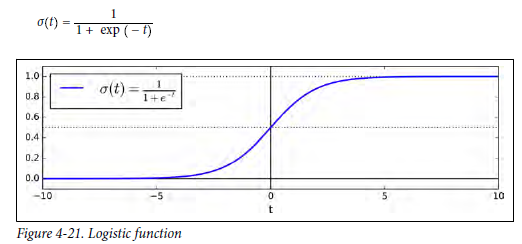

Training and Cost Function

Good, now you know how a Logistic Regression model estimates probabilities and
makes predictions. But how is it trained? The objective of training is to set the parameter
vector θ so that the model estimates high probabilities for positive instances (y =1) 
and low probabilities for negative instances (y = 0). This idea is captured by the
cost function shown in Equation 4-16 for a single training instance x.

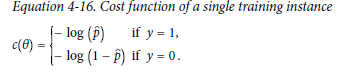

This cost function makes sense because – log(t) grows very large when t approaches
0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, 
and it will also be very large if the model estimates a probability close to 1
for a negative instance. On the other hand, – log(t) is close to 0 when t is close to 1, so
the cost will be close to 0 if the estimated probability is close to 0 for a negative
instance or close to 1 for a positive instance, which is precisely what we want.
The cost function over the whole training set is simply the average cost over all training
instances. It can be written in a single expression (as you can verify easily), called
the log loss.

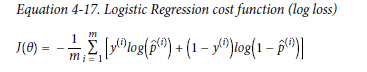

Once you have the gradient vector containing all
the partial derivatives you can use it in the Batch Gradient Descent algorithm. That’s
it: you now know how to train a Logistic Regression model. For Stochastic GD you
would of course just take one instance at a time, and for Mini-batch GD you would
use a mini-batch at a time.

<b>Decision Boundaries</b>

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that
contains the sepal and petal length and width of 150 iris flowers of three different
species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

In [60]:
from sklearn import datasets
iris = datasets.load_iris()
df=pd.DataFrame(iris['data'],columns=iris['feature_names'])

In [61]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [62]:
y =(iris["target"] == 2).astype(np.int)
y=y.reshape(y.shape[0],)

In [63]:
from sklearn.linear_model import LogisticRegression

X=df.copy()
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

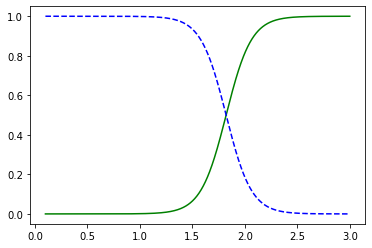

In [103]:
X_new = [[np.linspace(5, 10, 1000)],[np.linspace(2, 5, 1000)],
         [np.linspace(1, 8, 1000)],[np.linspace(0.1, 3, 1000)]]

X_df=[]
for i in range(1000):
    X_df.append([X_new[0][0][i],X_new[1][0][i],X_new[2][0][i],X_new[3][0][i]])
X_df=pd.DataFrame(X_df)
y_proba = log_reg.predict_proba(X_df)
plt.plot(X_df[3], y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_df[3], y_proba[:, 0], "b--", label="Not Iris-Virginica")

In between these extremes, the classifier is unsure. However, if you ask it to
predict the class (using the predict() method rather than the predict_proba()
method), it will return whichever class is the most likely. Therefore, there is a decision
boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal
width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-
Virginica, or else it will predict that it is not (even if it is not very confident):

<b>Softmax Regression</b>

The Logistic Regression model can be generalized to support multiple classes directly,
without having to train and combine multiple binary classifiers (as discussed in
Chapter 3). This is called Softmax Regression, or Multinomial Logistic Regression

The Softmax Regression classifier predicts only one class at a time
(i.e., it is multiclass, not multioutput) so it should be used only with
mutually exclusive classes such as different types of plants. You
cannot use it to recognize multiple people in one picture.

Cross entropy is frequently used to measure how
well a set of estimated class probabilities match the target classes

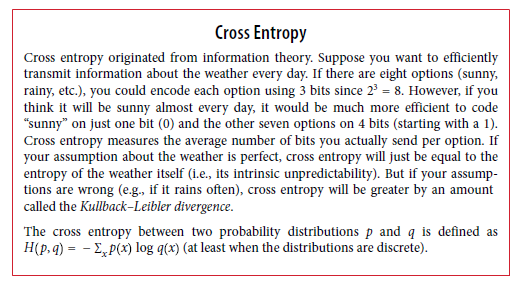